In [2]:
!pip install pandas scikit-learn matplotlib kagglehub

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [kagglehub]


In [89]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("asadullahcreative/global-gdp-explorer-2024-world-bank-un-data")

gdp = pd.read_csv(f'{path}/Global GDP Explorer 2025 (World Bank  UN Data).csv')

gdp.head()

,Unnamed: 0,Country,"GDP (nominal, 2023)",GDP (abbrev.),GDP Growth,Population 2023,GDP per capita,Share of World GDP
0,0,United States,"$27,720,700,000,000",27.721 trillion,2.89%,343477335,"$80,706",26.11%
1,1,China,"$17,794,800,000,000",17.795 trillion,5.25%,1422584933,"$12,509",16.76%
2,2,Germany,"$4,525,700,000,000",4.526 trillion,−0.27%,84548231,"$53,528",4.26%
3,3,Japan,"$4,204,490,000,000",4.204 trillion,1.68%,124370947,"$33,806",3.96%
4,4,India,"$3,567,550,000,000",3.568 trillion,8.15%,1438069596,"$2,481",3.36%


In [57]:
gdp.head()

,Ranking,Country,"GDP (nominal, 2023)",GDP (abbrev.),GDP Growth,Population 2023,GDP per capita,Share of World GDP
0,0,United States,"$27,720,700,000,000",27.721 trillion,2.89%,343477335,"$80,706",26.11%
1,1,China,"$17,794,800,000,000",17.795 trillion,5.25%,1422584933,"$12,509",16.76%
2,2,Germany,"$4,525,700,000,000",4.526 trillion,−0.27%,84548231,"$53,528",4.26%
3,3,Japan,"$4,204,490,000,000",4.204 trillion,1.68%,124370947,"$33,806",3.96%
4,4,India,"$3,567,550,000,000",3.568 trillion,8.15%,1438069596,"$2,481",3.36%


In [56]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Ranking              181 non-null    int64 
 1   Country              181 non-null    object
 2   GDP (nominal, 2023)  181 non-null    object
 3   GDP (abbrev.)        181 non-null    object
 4   GDP Growth           181 non-null    object
 5   Population 2023      181 non-null    int64 
 6   GDP per capita       181 non-null    object
 7   Share of World GDP   181 non-null    object
dtypes: int64(2), object(6)
memory usage: 11.4+ KB


In [61]:
gdp.describe()

,Ranking,"GDP (nominal, 2023)",GDP Growth,Population 2023,GDP per capita
count,181.000000,1.810000e+02,181.000000,1.810000e+02,181.000000
mean,90.000000,5.777519e+11,3.277017,4.358453e+07,17711.292818
std,52.394338,2.516689e+12,6.863584,1.555468e+08,23301.494510
min,0.000000,6.228031e+07,-20.110000,9.816000e+03,193.000000
25%,45.000000,1.464452e+10,1.190000,2.311472e+06,2478.000000
50%,90.000000,4.852960e+10,2.940000,9.130429e+06,7182.000000
75%,135.000000,3.355330e+11,5.040000,3.363516e+07,22798.000000
max,180.000000,2.772070e+13,75.060000,1.438070e+09,128936.000000


In [22]:
gdp['Country'].value_counts()

Country
United States    1
Guinea           1
Mali             1
Mongolia         1
Burkina Faso     1
                ..
Ecuador          1
Sudan            1
Oman             1
Kenya            1
Tuvalu           1
Name: count, Length: 181, dtype: int64

In [90]:
gdp = gdp.rename(columns={"Unnamed: 0": "Ranking"})
gdp["GDP (nominal, 2023)"] = gdp["GDP (nominal, 2023)"].str.replace(r"[\$,]", "", regex=True)
gdp["GDP (nominal, 2023)"] = pd.to_numeric(gdp["GDP (nominal, 2023)"])
gdp["GDP per capita"] = gdp["GDP per capita"].str.replace(r"[\$,]", "", regex=True)
gdp["GDP per capita"] = pd.to_numeric(gdp["GDP per capita"])
gdp["GDP Growth"] = gdp["GDP Growth"].str.replace(r"[\%]", "", regex=True).str.replace(r"[−–—]", "-", regex=True)
gdp["GDP Growth"] = pd.to_numeric(gdp["GDP Growth"])
gdp["Share of World GDP"] = gdp["Share of World GDP"].str.replace(r"[\%]", "", regex=True)
gdp["Share of World GDP"] = pd.to_numeric(gdp["Share of World GDP"])

[]

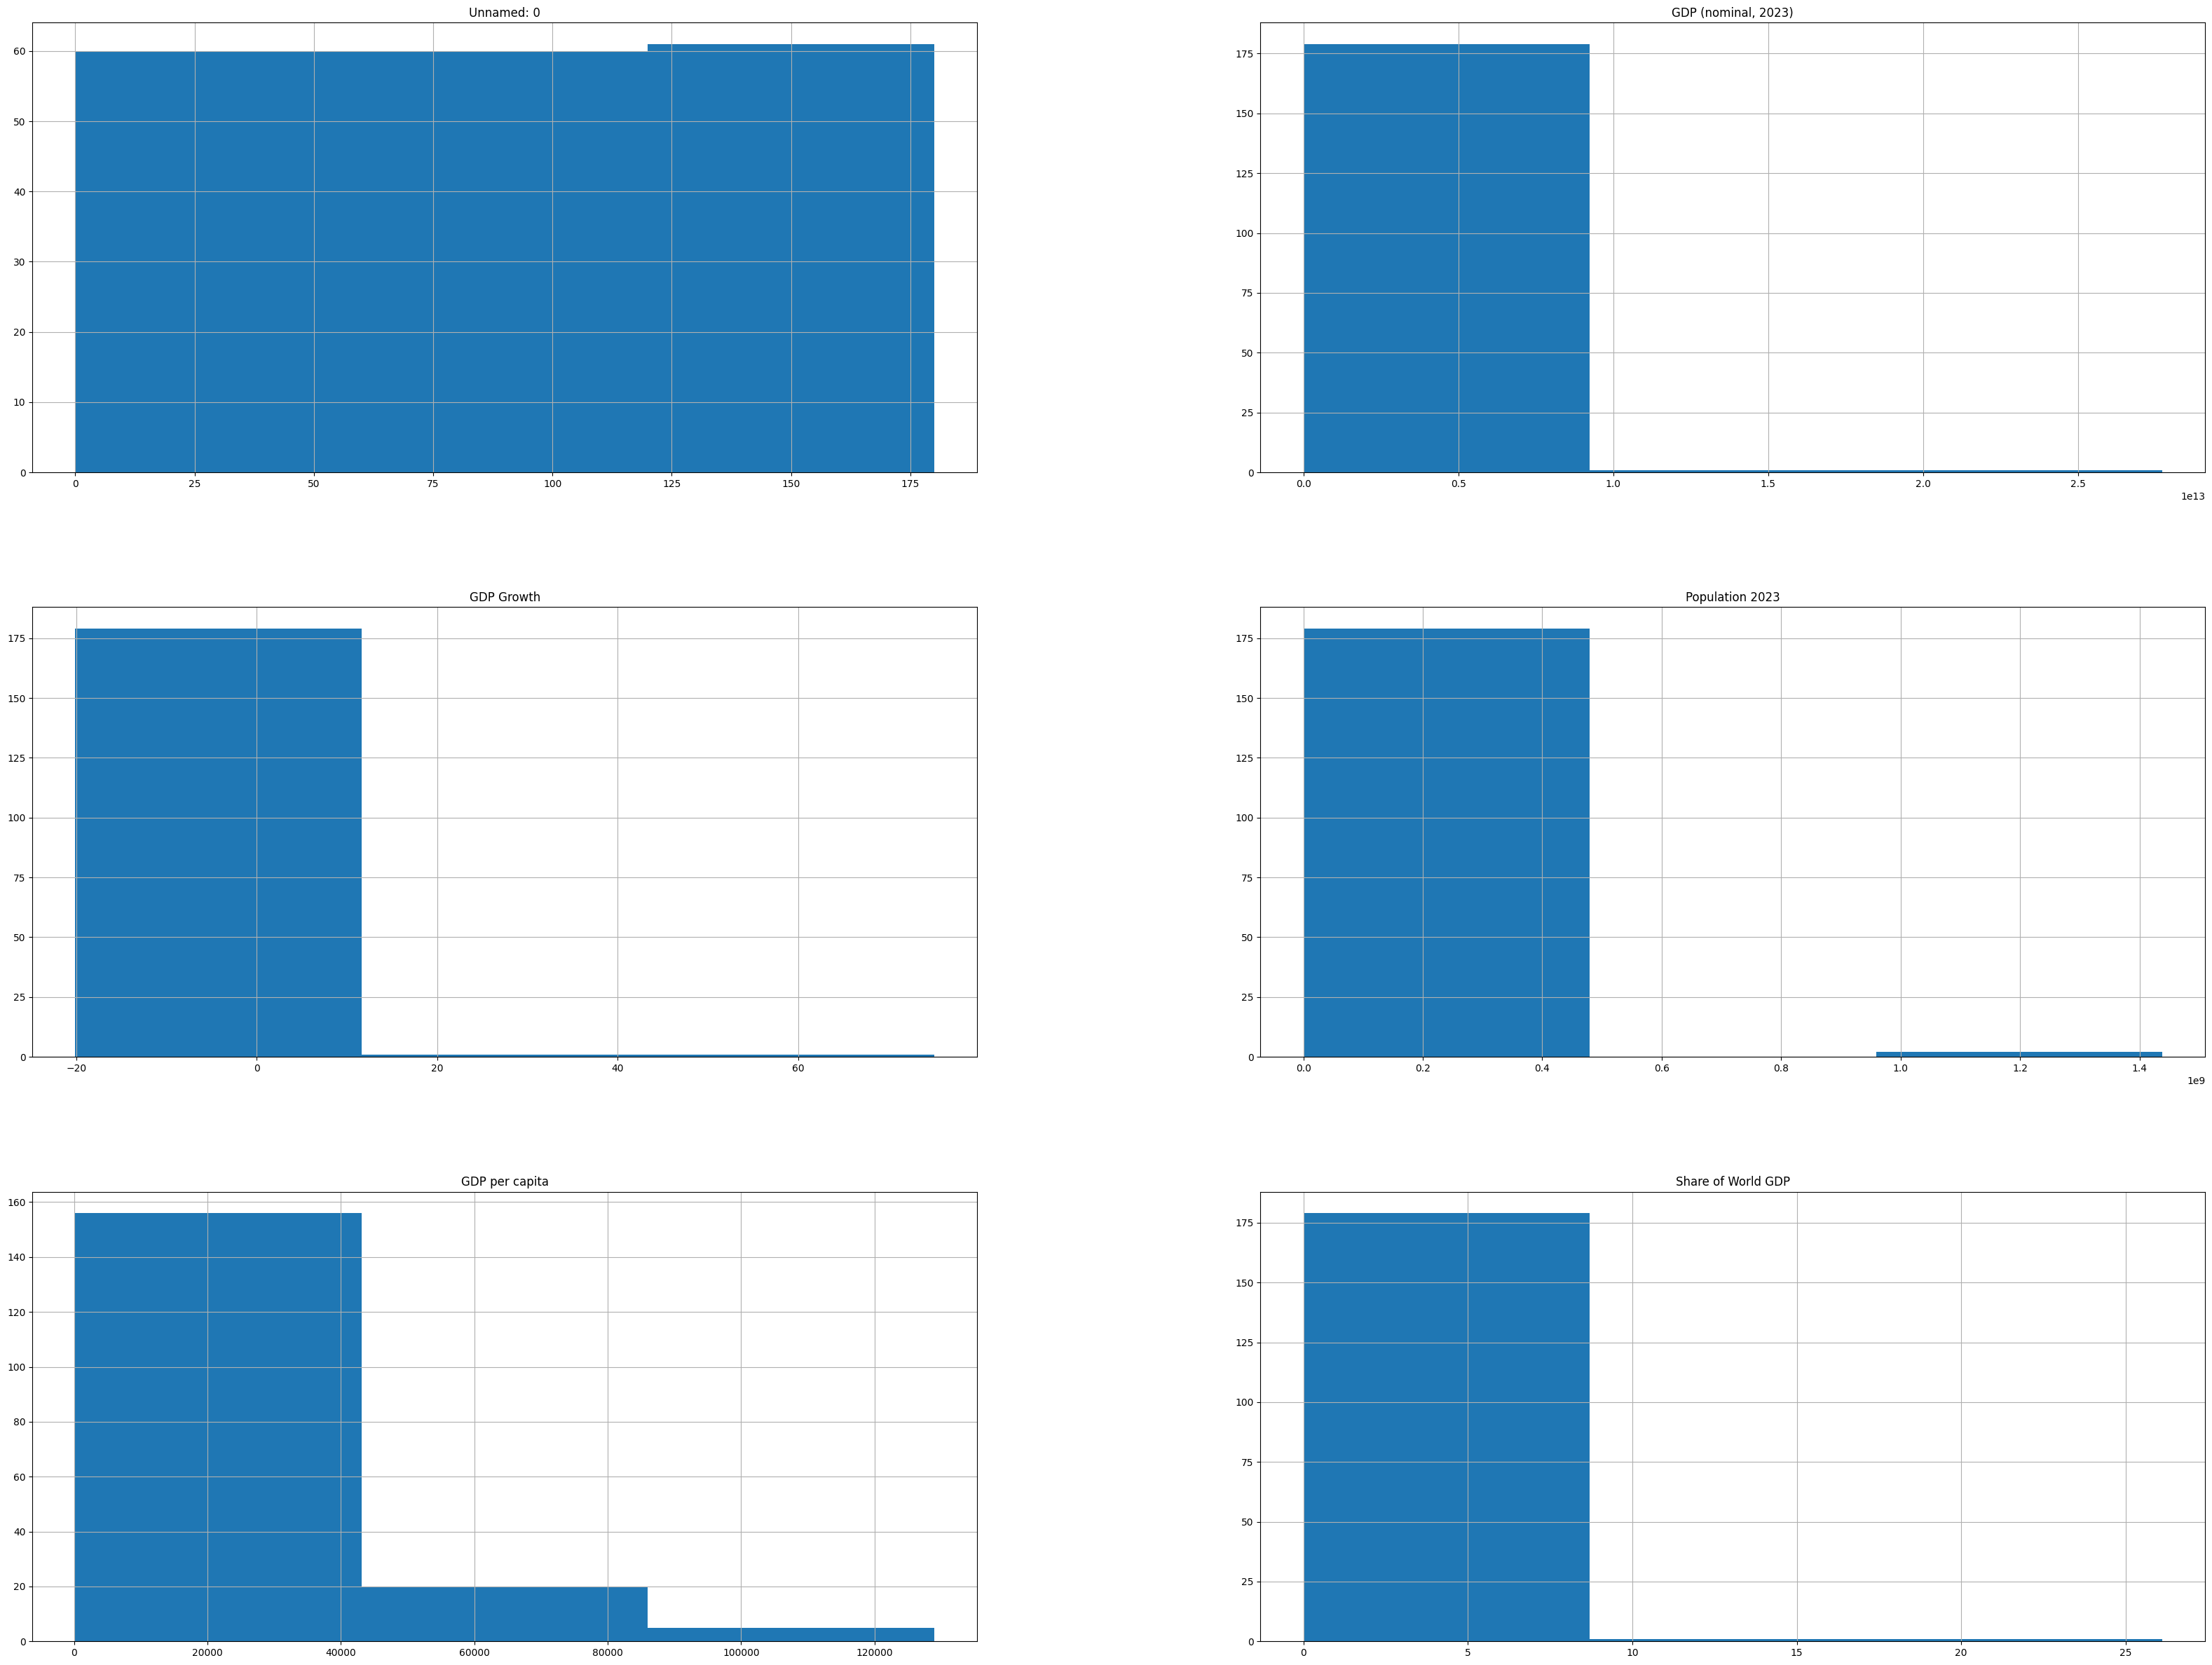

In [69]:
import matplotlib.pyplot as plt

gdp.hist(bins=3, figsize=(40, 30))

plt.plot()

<Axes: >

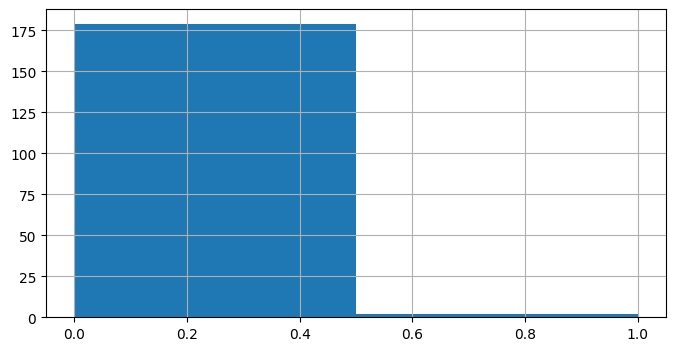

In [79]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

gdp["Share of World GDP (scaled)"] = scaler.fit_transform(gdp[["Share of World GDP"]])

gdp["Share of World GDP (scaled)"].hist(bins=2, figsize=(8, 4))

0      26.110000
1      16.760000
2       4.260000
3       3.960000
4       3.360000
         ...    
176     0.000430
177     0.000270
178     0.000260
179     0.000240
180     0.000059
Name: Share of World GDP, Length: 181, dtype: float64

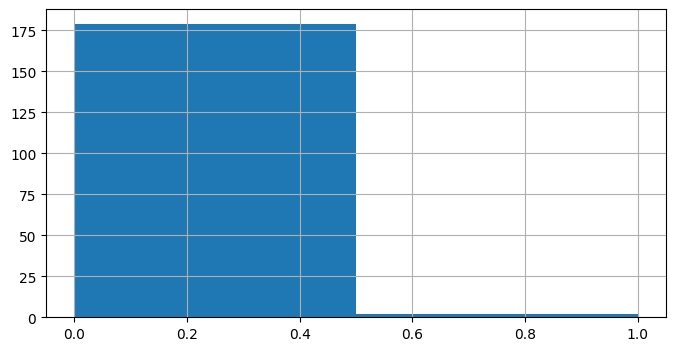

In [86]:
import numpy as np

gdp["Share of World GDP (sqrt)"] = np.sqrt(gdp["Share of World GDP (scaled)"])
gdp["Share of World GDP (sqrt)"] .hist(bins=2, figsize=(8, 4))

gdp["Share of World GDP"]

0      3.262318
1      2.818995
2      1.449269
3      1.376244
4      1.211941
         ...   
176   -7.749402
177   -8.213392
178   -8.250990
179   -8.330714
180   -9.721166
Name: log_gdp_share, Length: 181, dtype: float64

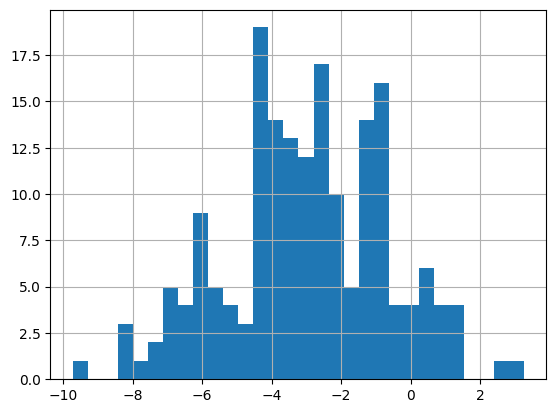

In [94]:

import numpy as np

gdp["log_gdp_share"] = np.log(gdp["Share of World GDP"] + 1e-6)

gdp["log_gdp_share"].hist(bins=30)

gdp["log_gdp_share"]